In [1]:
from PINNs import *
import torch
import numpy as np
import matplotlib.pyplot as plt
from smt.sampling_methods import LHS

In [16]:
dtype=torch.float64
setup_seed(3)
num_x = 400                                                        
num_t = 100                                                        
num_ic = 1000                                           
num_int = 20000                                            
Time = 0.5
L = 1
Tstart = 0
Tend = 0.5
Xstart = -1
Xend = 2

In [17]:
def train(epoch):
    def closure():
      optimizer.zero_grad()                                              
      
      loss_pde = model.loss_pde(x_int) 
      loss_ic = model.loss_ic(x_ic,u_ic)
      #loss_bd =  0.0*model.loss_bd(x_bdL_ignore,u_bdL_ignore)
      loss = loss_pde + 10*loss_ic#+10*loss_bd 

      print(f'epoch {epoch} loss_pde:{loss_pde:.8f}, loss_ic:{loss_ic:.8f}')
      loss.backward()
      return loss
    loss = optimizer.step(closure)
    return loss 

In [18]:
x_ic,x_bc,x_int = Mesh_Data(num_x,num_t,Tstart,Tend, Xstart,Xend)

xlimits = np.array([[0.,Time],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_int= sampling(num_int)

xlimits = np.array([[0.,0.0],[-L, 2*L]])  #interal
sampling = LHS(xlimits=xlimits)
x_ic= sampling(num_ic)


u_ic = IC_Combination_Wave(x_ic)
x_ic = torch.tensor(x_ic, dtype=dtype).to(cuda)
u_ic = torch.tensor(u_ic, dtype=dtype).to(cuda)
x_int= torch.tensor(x_int,requires_grad=True,dtype=dtype).to(cuda)

In [19]:
model = PINNs_scalar_1D(Nl=5,Nn=30).to(cuda).double()

epoch = 0
epochi = epoch
lr = 0.001                                                           # Learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
epochs = 100000
loss_history=[]
tic = time.time()
for epoch in range(1+epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    if loss < 0.05:
        break
toc = time.time()
print(f'Total training time: {toc - tic}')

epoch 1 loss_pde:0.00085773, loss_ic:0.11791783
loss_tot:1.18003605
epoch 2 loss_pde:0.00192467, loss_ic:0.11336997
loss_tot:1.13562439
epoch 3 loss_pde:0.00343054, loss_ic:0.11077283
loss_tot:1.11115886
epoch 4 loss_pde:0.00534605, loss_ic:0.10968887
loss_tot:1.10223473
epoch 5 loss_pde:0.00753866, loss_ic:0.10927032
loss_tot:1.10024190
epoch 6 loss_pde:0.00973873, loss_ic:0.10884787
loss_tot:1.09821745
epoch 7 loss_pde:0.01168587, loss_ic:0.10824903
loss_tot:1.09417620
epoch 8 loss_pde:0.01319008, loss_ic:0.10759919
loss_tot:1.08918200
epoch 9 loss_pde:0.01411374, loss_ic:0.10708242
loss_tot:1.08493795
epoch 10 loss_pde:0.01436625, loss_ic:0.10680758
loss_tot:1.08244209
epoch 11 loss_pde:0.01393228, loss_ic:0.10675602
loss_tot:1.08149252
epoch 12 loss_pde:0.01290140, loss_ic:0.10680558
loss_tot:1.08095719
epoch 13 loss_pde:0.01144770, loss_ic:0.10681654
loss_tot:1.07961305
epoch 14 loss_pde:0.00976688, loss_ic:0.10671163
loss_tot:1.07688321
epoch 15 loss_pde:0.00802673, loss_ic:0.106

In [20]:
optimizer = torch.optim.LBFGS(model.parameters(),lr=1,max_iter=20)
epochi = epoch

epochs = 2000
tic = time.time()
for epoch in range(epochi, epochs+epochi):
    loss = train(epoch)
    print(f'loss_tot:{loss:.8f}')
    loss_history.append(to_numpy(loss))
    #if loss < 0.01:
    #    break
toc = time.time()

print(f'Total training time: {toc - tic}')

epoch 9921 loss_pde:0.00000431, loss_ic:0.00535841
epoch 9921 loss_pde:0.00000398, loss_ic:0.04179730
epoch 9921 loss_pde:0.00000422, loss_ic:0.00496618


epoch 9921 loss_pde:0.00000421, loss_ic:0.00496493
epoch 9921 loss_pde:0.00000419, loss_ic:0.00496444
epoch 9921 loss_pde:0.00000412, loss_ic:0.00496309
epoch 9921 loss_pde:0.00000409, loss_ic:0.00496258
epoch 9921 loss_pde:0.00000408, loss_ic:0.00496244
epoch 9921 loss_pde:0.00000409, loss_ic:0.00496237
epoch 9921 loss_pde:0.00000412, loss_ic:0.00496217
epoch 9921 loss_pde:0.00000417, loss_ic:0.00496194
epoch 9921 loss_pde:0.00000432, loss_ic:0.00496142
epoch 9921 loss_pde:0.00000479, loss_ic:0.00496043
epoch 9921 loss_pde:0.00000590, loss_ic:0.00495898
epoch 9921 loss_pde:0.00000775, loss_ic:0.00495702
epoch 9921 loss_pde:0.00000914, loss_ic:0.00495518
epoch 9921 loss_pde:0.00001039, loss_ic:0.00495295
epoch 9921 loss_pde:0.00001133, loss_ic:0.00495022
epoch 9921 loss_pde:0.00001326, loss_ic:0.00494381
epoch 9921 loss_pde:0.00001618, loss_ic:0.00493527
loss_tot:0.05358840
epoch 9922 loss_pde:0.00002141, loss_ic:0.00492515
epoch 9922 loss_pde:0.00002482, loss_ic:0.00491639
epoch 9922 

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

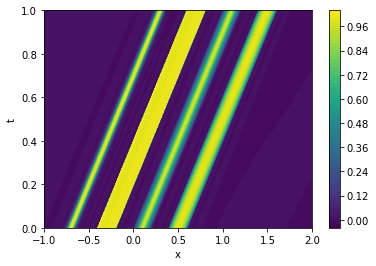

In [29]:
Nd = 400
x = np.linspace(-1, 2, 400)                                  
t = np.linspace(0, 1.0, 400)                                        
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
Np = x_test.shape[0]
uexact = np.zeros(Np)
for i in range(Np):
    uexact[i] = Combination_wave(x_test[i,1]-x_test[i,0])
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
ue = np.zeros((Nd,Nd))
uerror = np.zeros((Nd,Nd))
for j in range(0,Nd):
    for i in range(0,Nd):
        ue[i,j] = u[i*Nd+j,0]
        uerror[i,j] = np.abs(u[i*Nd+j,0] - uexact[i*Nd+j])
#loss = model.loss_pde(x_test)                                 

var2 = """TITLE="Euler"
 VARIABLES="x","y","u","error"
ZONE I=         400 J=         400 F=POINT
"""
filename = "CombineWave.dat" 
uo = ue.flatten()[:,None]
uer = uerror.flatten()[:,None]
uxy= np.hstack((X, T,uo,uer)) 
f = open(filename,'w')
f.write(var2)
np.savetxt(f, uxy)# Vectorized whole domain
f.close()
    #    uo = ue.flatten()[:,None]
    #    uxy= np.hstack((X, Y,uo))                                            # Vectorized whole domain
    
import matplotlib.pyplot as plt
plt.figure()
plt.figure()
ax = plt.gca()
cset = ax.contourf(x_grid[:,:],t_grid[:,:],ue,60)
#plt.plot(x[:],u_pred[:,0])

plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(cset, ax=ax)
plt.savefig('CombinationWave.eps', format='eps')
plt.show()

<Figure size 432x288 with 0 Axes>

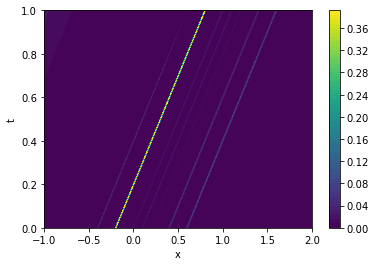

In [23]:
plt.figure()
plt.figure()
ax = plt.gca()
cset = ax.contourf(x_grid[:,:],t_grid[:,:],uerror,60)
#plt.plot(x[:],u_pred[:,0])

plt.xlabel('x')
plt.ylabel('t')
plt.colorbar(cset, ax=ax)
plt.savefig('CombinationWaveError.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


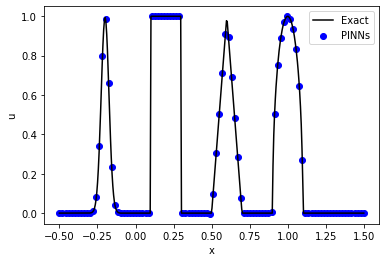

In [33]:
Nd = 400
x = np.linspace(-0.5, 1.5, 100)                                  
t = np.linspace(0.5, 0.5, 1)                         
t_grid, x_grid = np.meshgrid(t, x)                              
T = t_grid.flatten()[:, None]                                   
X = x_grid.flatten()[:, None]                                   
x_test = np.hstack((T, X))                                      
x_test = torch.tensor(x_test, requires_grad=True, dtype=dtype).to(cuda)
u = to_numpy(model(x_test))
#res = to_numpy(model.res_pde(x_test))
#d   = to_numpy(model.lambda_pde(x_test))
x_e = np.linspace(-0.5, 1.5, Nd)                                  
u_e = np.zeros(Nd)
for i in range(Nd):
    u_e[i] = Combination_wave(x_e[i]-0.5)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_e[:],u_e[:],color='black' ,label='Exact')
plt.scatter(x[:],u[:,0],label='PINNs',color='blue')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.plot(x[:],Exact_u[:,200])
plt.savefig('CombinationWaveLine.eps', format='eps')
plt.show()

l2_relative_error(u[:,0],u_e)

In [34]:

l2_relative_error(u[:,0],u_e)

ValueError: operands could not be broadcast together with shapes (100,) (400,) 